In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, clear_output
import preprocessing
from PIL import Image as im


plt.style.use(['seaborn-colorblind', 'seaborn-darkgrid'])
plt.rcParams.update({'font.size': 20})

np.set_printoptions(suppress=True, precision=3)

# Automatically reload external modules
%load_ext autoreload
%autoreload 2

Binary VS. Bipolar

Bipolar:

In [2]:
img1 = im.open("data/train_img_1.png")
img2 = im.open("data/train_img_2.png")
img3 = im.open("data/train_img_3.png")

In [3]:
imgs = preprocessing.resize_imgs([img1, img2, img3], 128, 128)

In [19]:
def row_plot(imgs, title, cmap='bone', sz=(12, 4)):
    '''Plots images in `imgs` in a single row
        
    Parameters:
    -----------
    imgs: ndarray. shape=(N, Iy, Ix)
        Images to display in the row.
    title: str. Title for entire figure.
    cmap: str. Matplotlib color scale to use when plotting.
        Some good options are "bone" for binary and "grayscale" for grayscale images.
    sz: tuple. Format=(fig_width, fig_height). Size of the entire plot figure.
    
    TODO:
    - Generate the row of images, making sure you set the figure size and color scheme.
    - Label each image with its index in `imgs` (e.g. 0, 1, 2)
    '''
    
    fig = plt.figure(figsize= sz)
    fig.suptitle(title)
    N = imgs.shape[0]
    for i in range(N):
        a = fig.add_subplot(1, N, i+1)
        imgplot = plt.imshow(imgs[i], cmap = cmap)
        a.set_title('Index: ' + str(i))

def plot_data_and_recalled(data, recalled, maxRows=5, cmap='bone', sz=(4, 10)):
    '''Plot a grid of images where corresponding `data` and `recalled` images are in
    the same row side-by-side.
    
    Parameters:
    -----------
    data: ndarray. shape=(N, Iy, Ix)
        Original images used to train network
    recalled: ndarray. shape=(N, Iy, Ix)
        Recalled images generatedd from the train network
    maxRows: int. Limit the number of rows to this number.
    cmap: str. Matplotlib color scale to use when plotting.
        Some good options are "bone" for binary and "grayscale" for grayscale images.
    sz: tuple. Format=(fig_width, fig_height). Size of the entire plot figure.
    
    TODO:
    - Generate the row of images, making sure you set the color scheme.
    - Label the columns "data" and "recalled"
    '''
    fig = plt.figure(figsize= sz)
    
    N = data.shape[0]
    
    for i in range(N):
        a = fig.add_subplot(N, 2, 2*i+1)
        imgplot = plt.imshow(data[i], cmap = cmap)
        a.set_title('data')
        
        a = fig.add_subplot(N, 2, 2*i+2)
        imgplot = plt.imshow(recalled[i], cmap = cmap)
        a.set_title('recalled')

In [4]:
# Preprocess here - bipolar
imgs_pp = preprocessing.img2binaryvectors(imgs) 
print(f'After preprocessing, image data shape: {imgs_pp.shape}, dtype: {imgs_pp.dtype}, Unique values: {np.unique(imgs_pp)}')
print('You should see:\nAfter preprocessing, image data shape: (3, 16384), dtype: int64, Unique values: [-1  1]')

After preprocessing, image data shape: (3, 16384), dtype: int64, Unique values: [-1  1]
You should see:
After preprocessing, image data shape: (3, 16384), dtype: int64, Unique values: [-1  1]


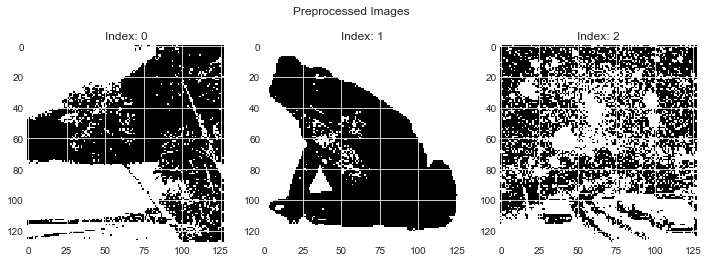

In [7]:
# Plot here - bipolar
imgs = preprocessing.vec2img(imgs_pp,128, 128)
row_plot(imgs, 'Preprocessed Images', cmap='gray')

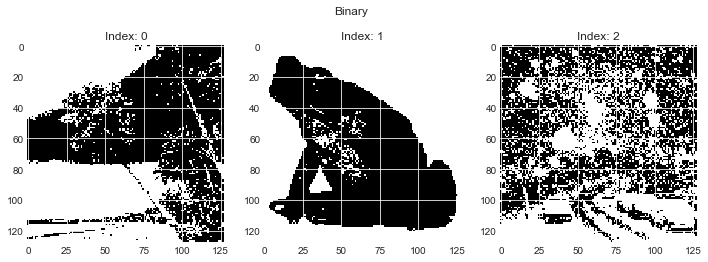

In [13]:
# change bipolar to binary; plot
imgs_binary = np.where(imgs_pp==-1, 0, 1)
row_plot(preprocessing.vec2img(imgs_binary,128, 128), 'Binary', cmap='gray')

In [14]:
from hopfield import HopfieldNet

In [18]:
net = HopfieldNet(imgs_binary, 128, 128)
preds = net.predict(imgs_binary, update_frac=0.1, verbose=False, show_dynamics=True)
print(f'Recovered image error rates: {preprocessing.recall_error(imgs_pp[np.arange(len(imgs_pp))], preds)}')

Recovered image error rates: 0.5050252278645834


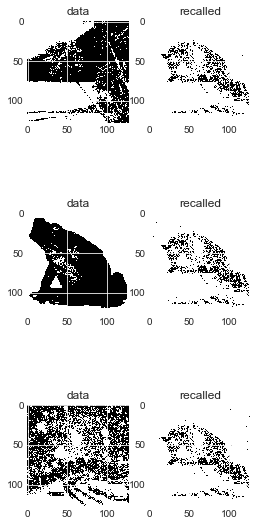

In [20]:
pred_imgs = preprocessing.vec2img(preds, 128, 128)
plot_data_and_recalled(imgs, pred_imgs, maxRows=5, cmap='gray', sz=(4, 10))

We find ourselves in a local minimum here. At first, the recalled images look like gibberish. However, as you look more closely, you can see that the recalled image has aspects of all the other images combined. It has the shape of the top of the frog, the bottom of the ocean, and the noisyness of the roads. Instead of hitting the energy minima where these images are stored, we hit a local minima where it is a mix of all these images. This is because the nature of binary vectors. 
Since binary vectors are far less likely to be orthogonal than bipolar vectors, it is more likely to return a mix of the memories. This is what we have here.

This is in large part because of the interference between the different memory vectors. We have a lot of different interference played back in these memories. This is why with bipolar vectors where we have fewer interferences, we can get perfect recall because we aren't getting confused between memories.